In [137]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import json_normalize

In [170]:
url = 'https://apis.dappradar.com/v2/dapps/top/uaw'

baseparams = {  
         'chain':'base',
         'range': '30d',
         'category':'games',
         'top':'100'
}
 # Replace 'YOUR_API_KEY' with your actual API key
headers = { 
    'accept':'application/json',
    'x-api-key': 'yourkey' 
}

response = requests.get(url, headers = headers, params = baseparams)

In [171]:
df = response.json()
rec = df['results']
base_top100 = json_normalize(rec)
base_top100 = base_top100[['name','metrics.transactions','metrics.uaw','metrics.volume','metrics.balance']].dropna()
base_top100 = base_top100[base_top100['metrics.uaw'] > 10]

In [172]:
arbparams = {  
         'chain':'arbitrum',
         'range': '30d',
         'category':'games',
         'top':'100'
}
response = requests.get(url, headers = headers, params = arbparams)

In [173]:
df = response.json()
rec = df['results']
arb_top100 = json_normalize(rec)
arb_top100 = arb_top100[['name','metrics.transactions','metrics.uaw','metrics.volume','metrics.balance']].dropna()
arb_top100 = arb_top100[arb_top100['metrics.uaw'] > 10]

In [174]:
blastparams = {  
         'chain':'blast',
         'range': '30d',
         'category':'games',
         'top':'100'
}
response = requests.get(url, headers = headers, params = blastparams)

In [175]:
df = response.json()
rec = df['results']
blast_top100 = json_normalize(rec)
blast_top100 = blast_top100[['name','metrics.transactions','metrics.uaw','metrics.volume','metrics.balance']].dropna()
blast_top100 = blast_top100[blast_top100['metrics.uaw'] > 10]

In [247]:
plt.rc('ytick', labelsize=8) 

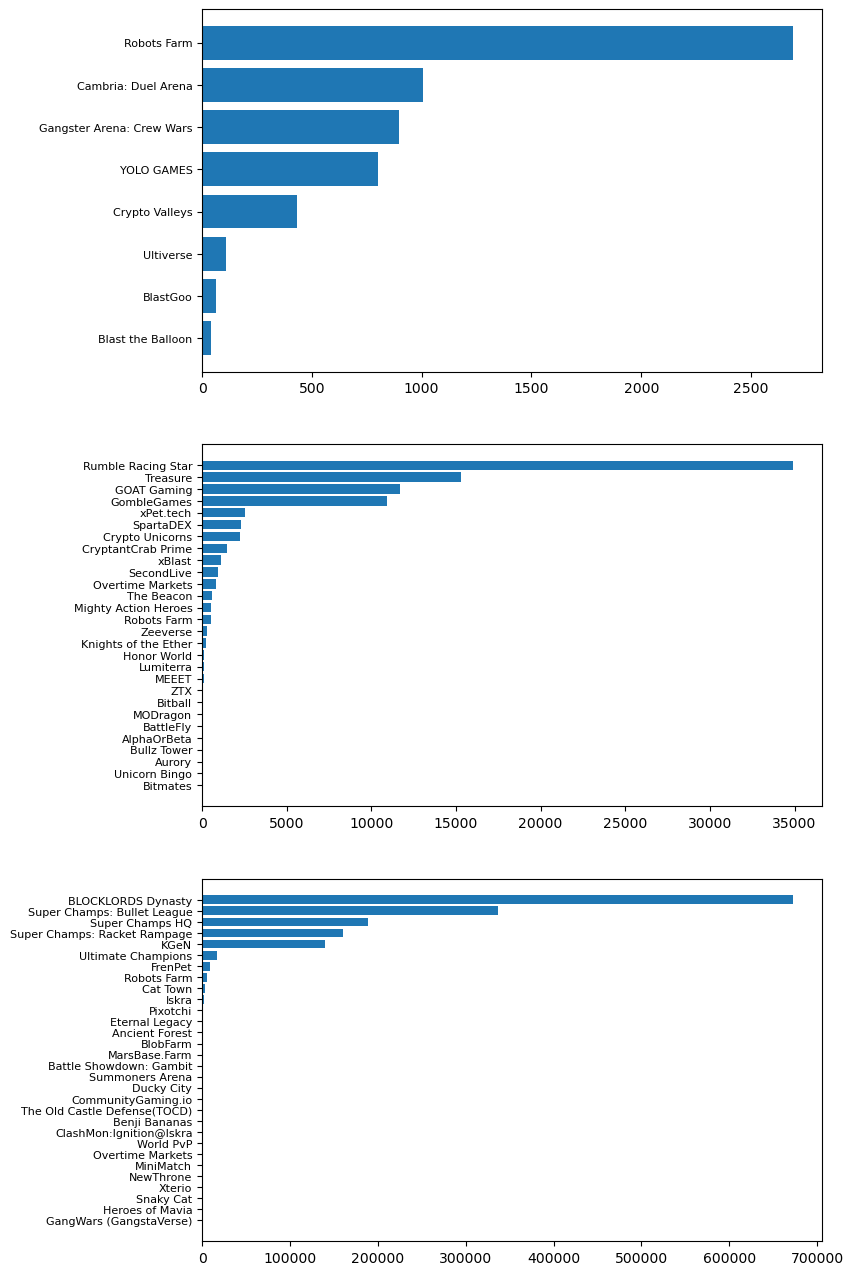

<Figure size 640x480 with 0 Axes>

In [276]:
plot, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (8,16))
ax1.barh(blast_top100['name'], blast_top100['metrics.uaw'], align='center')
ax1.set_yticks(blast_top100['name'])
ax1.invert_yaxis()  

ax2.barh(arb_top100['name'], arb_top100['metrics.uaw'], align='center')
ax2.set_yticks(arb_top100['name'])
ax2.invert_yaxis() 

ax3.barh(base_top100['name'], base_top100['metrics.uaw'], align='center')
ax3.set_yticks(base_top100['name'])
ax3.invert_yaxis() 

plt.show()

plt.savefig('chainfig.png')